In [1]:
# Loading the stuff you need
import numpy as np
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition, mark_inset)
import pickle
import matplotlib as mpl
from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy.stats import chisquare
from scipy import stats

# Path to save the figure - change as needed 
path = '/Users/emma/Desktop/AppStat_Figures'

# Some pretty colors to be used for plotting
technicolor = ['#00b9f2', '#008fd5', '#034da2', '#662e91', '#942977',
                       '#bf245e', '#ec1b30', '#f36523', '#ffc20f', '#ffec01', '#cadb2a',
                       '#8ec63f', '#00a640', '#008a4c', 'darkcyan']
lightblue   = technicolor[0]
blue        = technicolor[1]
darkblue    = technicolor[2]
purple      = technicolor[3]
darkmagenta = technicolor[4]
magenta     = technicolor[5]
red         = technicolor[6]
darkorange  = technicolor[7]
lightorange = technicolor[8]
yellow      = technicolor[9]
grass       = technicolor[10]
darkgrass   = technicolor[11]
green       = technicolor[12]
darkgreen   = technicolor[13]
darkcyan    = technicolor[14]

# This is just fior illustration, and may of course be omitted
fig = plt.figure(figsize=(10,6))
for i in range(len(technicolor)):
    plt.plot(i,1,marker='o',color=technicolor[i])

/Users/emma/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
def get_chi2(obs, err, fit, ddof):
    chi2_sum = [(i - j)**2 / e**2 for i,j,e in zip(obs,fit,err)]
    true_chi2 = np.sum(chi2_sum)
    true_p = stats.chi2.sf(true_chi2, len(obs)-1-ddof)
    return true_chi2,true_p

# Data

In [3]:
ballpath = '/Users/emma/Desktop/AppStat2020Project/Data/BallIncline/'
penpath = '/Users/emma/Desktop/AppStat2020Project/Data/Pendulum/'

bigL = pickle.load(open(ballpath+'Acceleration_plot_big_L_results.pkl','rb'))
bigR = pickle.load(open(ballpath+'Acceleration_plot_big_R_results.pkl','rb'))
midL = pickle.load(open(ballpath+'Acceleration_plot_mid_L_results.pkl','rb'))
midR = pickle.load(open(ballpath+'Acceleration_plot_mid_R_results.pkl','rb'))

simone = pickle.load(open(penpath+'SimoneTiming_results.pkl','rb'))
niall = pickle.load(open(penpath+'NiallTiming_results.pkl','rb'))
charl = pickle.load(open(penpath+'CharlTiming_results.pkl','rb'))

# Figure

# Figures - Ball

In [4]:
x_bigL = bigL['x']
y_bigL = bigL['y']
y_err_bigL = bigL['y_err']
fit_a_bigL = bigL['fit_a']
fit_a_err_bigL = bigL['fit_a_err']
fit_b_bigL = bigL['fit_b']
fit_b_err_bigL = bigL['fit_b_err']
fit_c_bigL = bigL['fit_c']
fit_c_err_bigL = bigL['fit_c_err']

x_bigR = bigR['x']
y_bigR = bigR['y']
y_err_bigR = bigR['y_err']
fit_a_bigR = bigR['fit_a']
fit_a_err_bigR = bigR['fit_a_err']
fit_b_bigR = bigR['fit_b']
fit_b_err_bigR = bigR['fit_b_err']
fit_c_bigR = bigR['fit_c']
fit_c_err_bigR = bigR['fit_c_err']

x_midL = midL['x']
y_midL = midL['y']
y_err_midL = midL['y_err']
fit_a_midL = midL['fit_a']
fit_a_err_midL = midL['fit_a_err']
fit_b_midL = midL['fit_b']
fit_b_err_midL = midL['fit_b_err']
fit_c_midL = midL['fit_c']
fit_c_err_midL = midL['fit_c_err']

x_midR = midR['x']
y_midR = midR['y']
y_err_midR = midR['y_err']
fit_a_midR = midR['fit_a']
fit_a_err_midR = midR['fit_a_err']
fit_b_midR = midR['fit_b']
fit_b_err_midR = midR['fit_b_err']
fit_c_midR = midR['fit_c']
fit_c_err_midR = midR['fit_c_err']

In [5]:
def ball(x,fit_a,fit_b,fit_c):
    return 0.5*fit_a*x**2+fit_b*x+fit_c

def ball_u(x,fit_a,fit_b,fit_c,fit_a_err,fit_b_err,fit_c_err):
    return 0.5*(fit_a+fit_a_err)*x**2+(fit_b+fit_b_err)*x+(fit_c+fit_c_err)

def ball_l(x,fit_a,fit_b,fit_c,fit_a_err,fit_b_err,fit_c_err):
    return 0.5*(fit_a-fit_a_err)*x**2+(fit_b-fit_b_err)*x+(fit_c-fit_c_err)

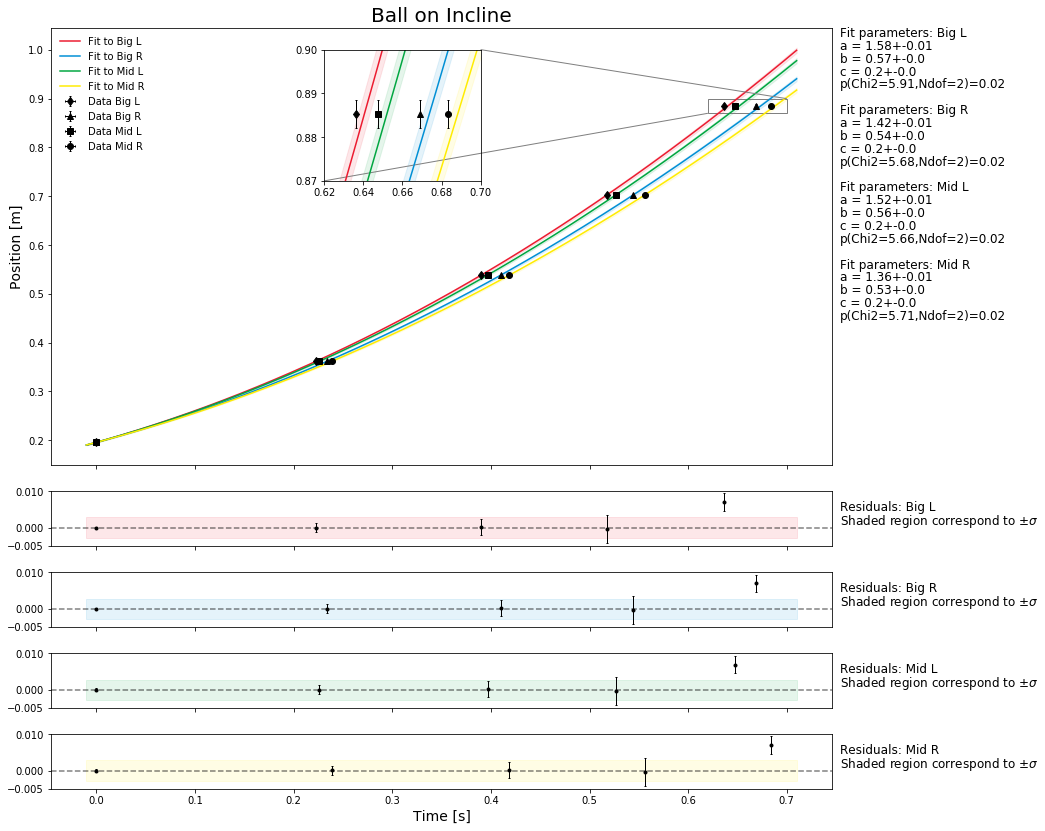

In [6]:
########################################################################
# The main figure
########################################################################

fig, axes = plt.subplots(figsize=(14,14),nrows=5,ncols=1,gridspec_kw={'height_ratios':[8,1,1,1,1]}, sharex=True)

ax1 = axes[0]
ax3 = axes[1]
ax4 = axes[2]
ax5 = axes[3]
ax6 = axes[4]

plt.rcParams['axes.labelsize'] = 12

# The data
ax1.errorbar(x_bigL, y_bigL, xerr=0.0, yerr=y_err_bigL, fmt='dk', ecolor='k', elinewidth=1, capsize=1, capthick=1,label='Data Big L')
ax1.errorbar(x_bigR, y_bigR, xerr=0.0, yerr=y_err_bigR, fmt='^k', ecolor='k', elinewidth=1, capsize=1, capthick=1,label='Data Big R')
ax1.errorbar(x_midL, y_midL, xerr=0.0, yerr=y_err_midL, fmt='sk', ecolor='k', elinewidth=1, capsize=1, capthick=1,label='Data Mid L')
ax1.errorbar(x_midR, y_midR, xerr=0.0, yerr=y_err_midR, fmt='ok', ecolor='k', elinewidth=1, capsize=1, capthick=1,label='Data Mid R')

# The fit
xaxis = np.linspace(-0.01,0.71,1000)
ax1.plot(xaxis,ball(xaxis,fit_a_bigL,fit_b_bigL,fit_c_bigL),marker='',linestyle='-',color=red,label='Fit to Big L')
ax1.fill_between(xaxis,ball_l(xaxis,fit_a_bigL,fit_b_bigL,fit_c_bigL,fit_a_err_bigL,fit_b_err_bigL,fit_c_err_bigL),ball_u(xaxis,fit_a_bigL,fit_b_bigL,fit_c_bigL,fit_a_err_bigL,fit_b_err_bigL,fit_c_err_bigL),color=red,alpha=0.1)
ax1.plot(xaxis,ball(xaxis,fit_a_bigR,fit_b_bigR,fit_c_bigR),marker='',linestyle='-',color=blue,label='Fit to Big R')
ax1.fill_between(xaxis,ball_l(xaxis,fit_a_bigR,fit_b_bigR,fit_c_bigR,fit_a_err_bigR,fit_b_err_bigR,fit_c_err_bigR),ball_u(xaxis,fit_a_bigR,fit_b_bigR,fit_c_bigR,fit_a_err_bigR,fit_b_err_bigR,fit_c_err_bigR),color=blue,alpha=0.1)
ax1.plot(xaxis,ball(xaxis,fit_a_midL,fit_b_midL,fit_c_midL),marker='',linestyle='-',color=green,label='Fit to Mid L')
ax1.fill_between(xaxis,ball_l(xaxis,fit_a_midL,fit_b_midL,fit_c_midL,fit_a_err_midL,fit_b_err_midL,fit_c_err_midL),ball_u(xaxis,fit_a_midL,fit_b_midL,fit_c_midL,fit_a_err_midL,fit_b_err_midL,fit_c_err_midL),color=green,alpha=0.1)
ax1.plot(xaxis,ball(xaxis,fit_a_midR,fit_b_midR,fit_c_midR),marker='',linestyle='-',color=yellow,label='Fit to Mid R')
ax1.fill_between(xaxis,ball_l(xaxis,fit_a_midR,fit_b_midR,fit_c_midR,fit_a_err_midR,fit_b_err_midR,fit_c_err_midR),ball_u(xaxis,fit_a_midR,fit_b_midR,fit_c_midR,fit_a_err_midR,fit_b_err_midR,fit_c_err_midR),color=yellow,alpha=0.1)

# Chi square
Ndof_bigL = len(x_bigL)-3
chi2_bigL,p_bigL = get_chi2(y_bigL, y_err_bigL, ball(x_bigL,fit_a_bigL,fit_b_bigL,fit_c_bigL), ddof=3)
Ndof_bigR = len(x_bigR)-3
chi2_bigR,p_bigR = get_chi2(y_bigR, y_err_bigR, ball(x_bigR,fit_a_bigR,fit_b_bigR,fit_c_bigR), ddof=3)
Ndof_midL = len(x_midL)-3
chi2_midL,p_midL = get_chi2(y_midL, y_err_midL, ball(x_midL,fit_a_midL,fit_b_midL,fit_c_midL), ddof=3)
Ndof_midR = len(x_midR)-3
chi2_midR,p_midR = get_chi2(y_midR, y_err_midR, ball(x_midR,fit_a_midR,fit_b_midR,fit_c_midR), ddof=3)

########################################################################
# The text, title, axes and legend
########################################################################

# Some axes and title
ax6.set_xlabel('Time [s]', fontsize=14)
ax1.set_ylabel('Position [m]', fontsize=14)
ax1.set_title('Ball on Incline', fontsize=20)

# Legend and information from text insert
ax1.legend(loc='upper left',frameon=False)

# Manually set the location of the informative text
xs = 1.01
ys = 0.98
s  = ['Fit parameters: Big L',
      f'a = {np.round(fit_a_bigL,2)}+-{np.round(fit_a_err_bigL,2)}', 
      f'b = {np.round(fit_b_bigL,2)}+-{np.round(fit_b_err_bigL,2)}', 
      f'c = {np.round(fit_c_bigL,2)}+-{np.round(fit_c_err_bigL,2)}',
      f'p(Chi2={np.round(chi2_bigL,2)},Ndof={Ndof_bigL})={np.round(p_bigL,2)}',
      '',
     'Fit parameters: Big R',
      f'a = {np.round(fit_a_bigR,2)}+-{np.round(fit_a_err_bigR,2)}', 
      f'b = {np.round(fit_b_bigR,2)}+-{np.round(fit_b_err_bigR,2)}', 
      f'c = {np.round(fit_c_bigR,2)}+-{np.round(fit_c_err_bigR,2)}',
      f'p(Chi2={np.round(chi2_bigR,2)},Ndof={Ndof_bigR})={np.round(p_bigR,2)}',
      '',
     'Fit parameters: Mid L',
      f'a = {np.round(fit_a_midL,2)}+-{np.round(fit_a_err_midL,2)}', 
      f'b = {np.round(fit_b_midL,2)}+-{np.round(fit_b_err_midL,2)}', 
      f'c = {np.round(fit_c_midL,2)}+-{np.round(fit_c_err_midL,2)}',
      f'p(Chi2={np.round(chi2_midL,2)},Ndof={Ndof_midL})={np.round(p_midL,2)}',
      '',
     'Fit parameters: Mid R',
      f'a = {np.round(fit_a_midR,2)}+-{np.round(fit_a_err_midR,2)}', 
      f'b = {np.round(fit_b_midR,2)}+-{np.round(fit_b_err_midR,2)}', 
      f'c = {np.round(fit_c_midR,2)}+-{np.round(fit_c_err_midR,2)}',
      f'p(Chi2={np.round(chi2_midR,2)},Ndof={Ndof_midR})={np.round(p_midR,2)}']

# Plotting it this way instead of the Troels way gives better resolution of text and more control of fontsize etc
for i in range(len(s)):
    ax1.text(xs, ys-i/34, s[i], horizontalalignment='left',verticalalignment='baseline', transform=ax1.transAxes,fontsize=12)

########################################################################
# The residuals
########################################################################

fit_res = y_bigL - ball(x_bigL,fit_a_bigL,fit_b_bigL,fit_c_bigL)
fit_res_err = y_bigL - ball(x_bigL,(fit_a_bigL+fit_a_err_bigL),(fit_b_bigL+fit_b_err_bigL),(fit_c_bigL+fit_c_err_bigL))
ax3.axhline(0,color='black',linestyle='--',alpha=0.5)
ax3.errorbar(x_bigL, fit_res, yerr = fit_res_err, xerr = 0.0, fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)
ax3.fill_between([-0.01,0.71],-fit_res.std(),fit_res.std(),color=red,alpha=0.1)
s = ['Residuals: Big L',r'Shaded region correspond to $\pm\sigma$']
for i in range(len(s)):
    ax3.text(xs, ys-1/3-i/4, s[i], horizontalalignment='left',verticalalignment='baseline', transform=ax3.transAxes,fontsize=12)
ax3.set_ylim(-0.005,0.01)
ax3.set_yticks([-0.005,0.0,0.01])

fit_res = y_bigR - ball(x_bigR,fit_a_bigR,fit_b_bigR,fit_c_bigR)
fit_res_err = y_bigR - ball(x_bigR,(fit_a_bigR+fit_a_err_bigR),(fit_b_bigR+fit_b_err_bigR),(fit_c_bigR+fit_c_err_bigR))
ax4.axhline(0,color='black',linestyle='--',alpha=0.5)
ax4.errorbar(x_bigR, fit_res, yerr = fit_res_err, xerr = 0.0, fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)
ax4.fill_between([-0.01,0.71],-fit_res.std(),fit_res.std(),color=blue,alpha=0.1)
s = ['Residuals: Big R',r'Shaded region correspond to $\pm\sigma$']
for i in range(len(s)):
    ax4.text(xs, ys-1/3-i/4, s[i], horizontalalignment='left',verticalalignment='baseline', transform=ax4.transAxes,fontsize=12)
ax4.set_ylim(-0.005,0.01)
ax4.set_yticks([-0.005,0.0,0.01])

fit_res = y_midL - ball(x_midL,fit_a_midL,fit_b_midL,fit_c_midL)
fit_res_err = y_midL - ball(x_midL,(fit_a_midL+fit_a_err_midL),(fit_b_midL+fit_b_err_midL),(fit_c_midL+fit_c_err_midL))
ax5.axhline(0,color='black',linestyle='--',alpha=0.5)
ax5.errorbar(x_midL, fit_res, yerr = fit_res_err, xerr = 0.0, fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)
ax5.fill_between([-0.01,0.71],-fit_res.std(),fit_res.std(),color=green,alpha=0.1)
s = ['Residuals: Mid L',r'Shaded region correspond to $\pm\sigma$']
for i in range(len(s)):
    ax5.text(xs, ys-1/3-i/4, s[i], horizontalalignment='left',verticalalignment='baseline', transform=ax5.transAxes,fontsize=12)
ax5.set_ylim(-0.005,0.01)
ax5.set_yticks([-0.005,0.0,0.01])

fit_res = y_midR - ball(x_midR,fit_a_midR,fit_b_midR,fit_c_midR)
fit_res_err = y_midR - ball(x_midR,(fit_a_midR+fit_a_err_midR),(fit_b_midR+fit_b_err_midR),(fit_c_midR+fit_c_err_midR))
ax6.axhline(0,color='black',linestyle='--',alpha=0.5)
ax6.errorbar(x_midR, fit_res, yerr = fit_res_err, xerr = 0.0, fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)
ax6.fill_between([-0.01,0.71],-fit_res.std(),fit_res.std(),color=yellow,alpha=0.1)
s = ['Residuals: Mid R',r'Shaded region correspond to $\pm\sigma$']
for i in range(len(s)):
    ax6.text(xs, ys-1/3-i/4, s[i], horizontalalignment='left',verticalalignment='baseline', transform=ax6.transAxes,fontsize=12)
ax6.set_ylim(-0.005,0.01)
ax6.set_yticks([-0.005,0.0,0.01])

########################################################################
# The insert figure - Upper
########################################################################

# Create a set of inset Axes: these should fill the bounding box allocated to them
ax2 = plt.axes([0.1,0.1,1,1])

# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.35,0.65,0.2,0.3])
ax2.set_axes_locator(ip)

# Mark the region corresponding to the inset axes on ax1 and draw lines in grey linking the two axes
mark_inset(ax1, ax2, loc1=1, loc2=3, fc="none", ec='0.5')

# The data for masked region
# The data
ax2.errorbar(x_bigL, y_bigL, xerr=0.0, yerr=y_err_bigL, fmt='dk', ecolor='k', elinewidth=1, capsize=1, capthick=1)
ax2.errorbar(x_bigR, y_bigR, xerr=0.0, yerr=y_err_bigR, fmt='^k', ecolor='k', elinewidth=1, capsize=1, capthick=1)
ax2.errorbar(x_midL, y_midL, xerr=0.0, yerr=y_err_midL, fmt='sk', ecolor='k', elinewidth=1, capsize=1, capthick=1)
ax2.errorbar(x_midR, y_midR, xerr=0.0, yerr=y_err_midR, fmt='ok', ecolor='k', elinewidth=1, capsize=1, capthick=1)

# The fit for the masked region
ax2.plot(xaxis,ball(xaxis,fit_a_bigL,fit_b_bigL,fit_c_bigL),marker='',linestyle='-',color=red)
ax2.fill_between(xaxis,ball_l(xaxis,fit_a_bigL,fit_b_bigL,fit_c_bigL,fit_a_err_bigL,fit_b_err_bigL,fit_c_err_bigL),ball_u(xaxis,fit_a_bigL,fit_b_bigL,fit_c_bigL,fit_a_err_bigL,fit_b_err_bigL,fit_c_err_bigL),color=red,alpha=0.1)
ax2.plot(xaxis,ball(xaxis,fit_a_bigR,fit_b_bigR,fit_c_bigR),marker='',linestyle='-',color=blue)
ax2.fill_between(xaxis,ball_l(xaxis,fit_a_bigR,fit_b_bigR,fit_c_bigR,fit_a_err_bigR,fit_b_err_bigR,fit_c_err_bigR),ball_u(xaxis,fit_a_bigR,fit_b_bigR,fit_c_bigR,fit_a_err_bigR,fit_b_err_bigR,fit_c_err_bigR),color=blue,alpha=0.1)
ax2.plot(xaxis,ball(xaxis,fit_a_midL,fit_b_midL,fit_c_midL),marker='',linestyle='-',color=green)
ax2.fill_between(xaxis,ball_l(xaxis,fit_a_midL,fit_b_midL,fit_c_midL,fit_a_err_midL,fit_b_err_midL,fit_c_err_midL),ball_u(xaxis,fit_a_midL,fit_b_midL,fit_c_midL,fit_a_err_midL,fit_b_err_midL,fit_c_err_midL),color=green,alpha=0.1)
ax2.plot(xaxis,ball(xaxis,fit_a_midR,fit_b_midR,fit_c_midR),marker='',linestyle='-',color=yellow)
ax2.fill_between(xaxis,ball_l(xaxis,fit_a_midR,fit_b_midR,fit_c_midR,fit_a_err_midR,fit_b_err_midR,fit_c_err_midR),ball_u(xaxis,fit_a_midR,fit_b_midR,fit_c_midR,fit_a_err_midR,fit_b_err_midR,fit_c_err_midR),color=yellow,alpha=0.1)

# The axis for the masked region
xmin = 0.63
xmax = 0.69
ymin = 0.87
ymax = 0.90
ax2.set_xticks([0.62,0.64,0.66,0.68,0.70])
ax2.set_yticks([0.87,0.88,0.89,0.90])
ax2.set_xlim(0.62,0.70)
ax2.set_ylim(0.87,0.90)

plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.rc('legend', fontsize=12)

# Save the figure
fig.savefig('{0}/{1}.pdf'.format(path,'ball'), bbox_inches = "tight")

# Figures - Pendulum

In [7]:
x_simone = simone['x']
y_simone = simone['y']
fit_slope_simone = simone['fit_slope']
fit_slope_err_simone = simone['fit_slope_err']
fit_cutoff_simone = simone['fit_cutoff']
fit_cutoff_err_simone = simone['fit_cutoff_err']

x_niall = niall['x']
y_niall = niall['y']
fit_slope_niall = niall['fit_slope']
fit_slope_err_niall = niall['fit_slope_err']
fit_cutoff_niall = niall['fit_cutoff']
fit_cutoff_err_niall = niall['fit_cutoff_err']

x_charl = charl['x']
y_charl = charl['y']
fit_slope_charl = charl['fit_slope']
fit_slope_err_charl = charl['fit_slope_err']
fit_cutoff_charl = charl['fit_cutoff']
fit_cutoff_err_charl = charl['fit_cutoff_err']

In [8]:
def pen(x,fit_slope,fit_cutoff):
    return fit_slope*x+fit_cutoff

def pen_u(x,fit_slope,fit_cutoff,fit_slope_err,fit_cutoff_err):
    return (fit_slope+fit_slope_err)*x+(fit_cutoff+fit_cutoff_err)

def pen_l(x,fit_slope,fit_cutoff,fit_slope_err,fit_cutoff_err):
    return (fit_slope-fit_slope_err)*x+(fit_cutoff-fit_cutoff_err)

In [9]:
u_simone = pen_u(x_simone,fit_slope_simone,fit_cutoff_simone,fit_slope_err_simone,fit_cutoff_err_simone)
l_simone = pen_l(x_simone,fit_slope_simone,fit_cutoff_simone,fit_slope_err_simone,fit_cutoff_err_simone)
ind_simone = []
for i in range(len(y_simone)):
    if y_simone[i]>u_simone[i] or y_simone[i]<l_simone[i]:
        ind_simone.append(i)
        
u_charl = pen_u(x_charl,fit_slope_charl,fit_cutoff_charl,fit_slope_err_charl,fit_cutoff_err_charl)
l_charl = pen_l(x_charl,fit_slope_charl,fit_cutoff_charl,fit_slope_err_charl,fit_cutoff_err_charl)
ind_charl = []
for i in range(len(y_charl)):
    if y_charl[i]>u_charl[i] or y_charl[i]<l_charl[i]:
        ind_charl.append(i)
        
u_niall = pen_u(x_niall,fit_slope_niall,fit_cutoff_niall,fit_slope_err_niall,fit_cutoff_err_niall)
l_niall = pen_l(x_niall,fit_slope_niall,fit_cutoff_niall,fit_slope_err_niall,fit_cutoff_err_niall)
ind_niall = []
for i in range(len(y_niall)):
    if y_niall[i]>u_niall[i] or y_niall[i]<l_niall[i]:
        ind_niall.append(i)

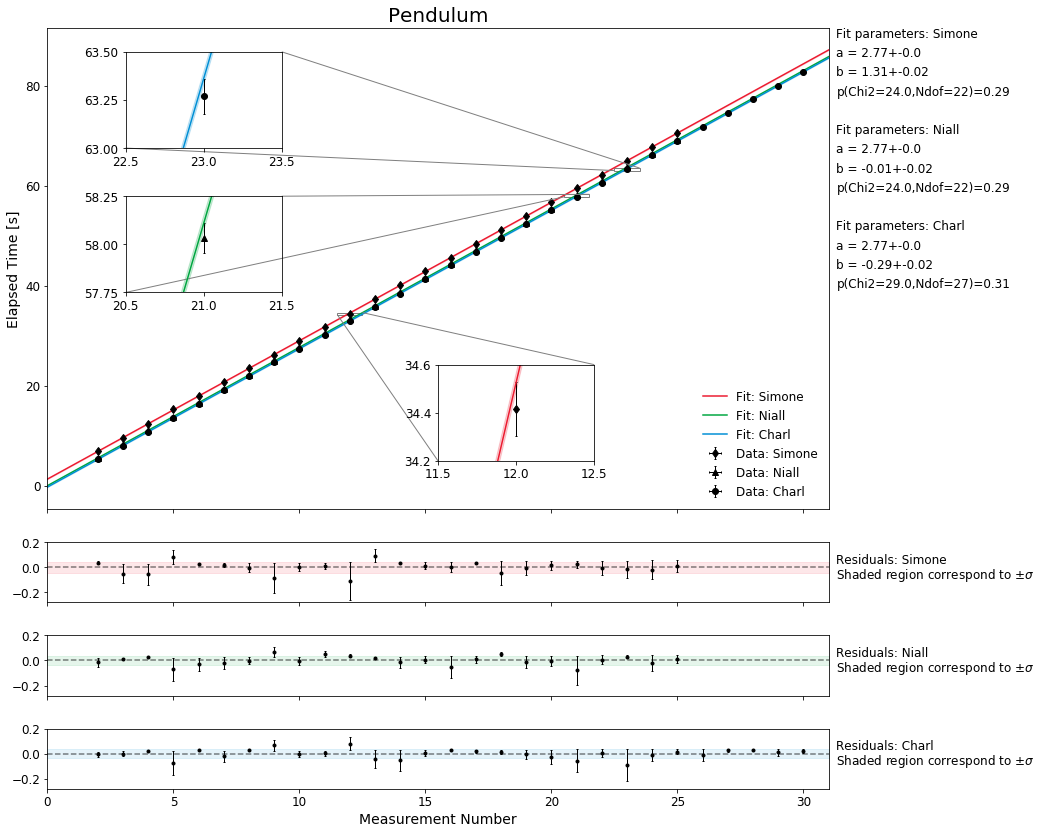

In [10]:
########################################################################
# The main figure
########################################################################

fig, axes = plt.subplots(figsize=(14,14),nrows=4,ncols=1,gridspec_kw={'height_ratios':[8,1,1,1]}, sharex=True)

ax1 = axes[0]
ax3 = axes[1]
ax4 = axes[2]
ax5 = axes[3]

plt.rcParams['axes.labelsize'] = 12

# The fit
xaxis = np.linspace(0.0,31.0,1000)
ax1.plot(xaxis,pen(xaxis,fit_slope_simone,fit_cutoff_simone),marker='',linestyle='-',color=red,label='Fit: Simone')
ax1.fill_between(xaxis,pen_l(xaxis,fit_slope_simone,fit_cutoff_simone,fit_slope_err_simone,fit_cutoff_err_simone),pen_u(xaxis,fit_slope_simone,fit_cutoff_simone,fit_slope_err_simone,fit_cutoff_err_simone),color=red,alpha=0.1)
ax1.plot(xaxis,pen(xaxis,fit_slope_niall,fit_cutoff_niall),marker='',linestyle='-',color=green,label='Fit: Niall')
ax1.fill_between(xaxis,pen_l(xaxis,fit_slope_niall,fit_cutoff_niall,fit_slope_err_niall,fit_cutoff_err_niall),pen_u(xaxis,fit_slope_niall,fit_cutoff_niall,fit_slope_err_niall,fit_cutoff_err_niall),color=green,alpha=0.1)
ax1.plot(xaxis,pen(xaxis,fit_slope_charl,fit_cutoff_charl),marker='',linestyle='-',color=blue,label='Fit: Charl')
ax1.fill_between(xaxis,pen_l(xaxis,fit_slope_charl,fit_cutoff_charl,fit_slope_err_charl,fit_cutoff_err_charl),pen_u(xaxis,fit_slope_charl,fit_cutoff_charl,fit_slope_err_charl,fit_cutoff_err_charl),color=blue,alpha=0.1)

#######################################################################
# The residuals
########################################################################

fit_res_simone = y_simone - (x_simone*fit_slope_simone + fit_cutoff_simone)
fit_res_err_simone = y_simone - (x_simone*(fit_slope_simone+fit_slope_err_simone) + (fit_cutoff_simone+fit_cutoff_err_simone))
fit_res_niall = y_niall - (x_niall*fit_slope_niall + fit_cutoff_niall)
fit_res_err_niall = y_niall - (x_niall*(fit_slope_niall+fit_slope_err_niall) + (fit_cutoff_niall+fit_cutoff_err_niall))
fit_res_charl = y_charl - (x_charl*fit_slope_charl + fit_cutoff_charl)
fit_res_err_charl = y_charl - (x_charl*(fit_slope_charl+fit_slope_err_charl) + (fit_cutoff_charl+fit_cutoff_err_charl))

# The data
ax1.errorbar(x_simone, y_simone, xerr=0.0, yerr=fit_res_simone, fmt='dk', label='Data: Simone', ecolor='k', elinewidth=1, capsize=1, capthick=1)
ax1.errorbar(x_niall, y_niall, xerr=0.0, yerr=fit_res_niall, fmt='^k', label='Data: Niall', ecolor='k', elinewidth=1, capsize=1, capthick=1)
ax1.errorbar(x_charl, y_charl, xerr=0.0, yerr=fit_res_charl, fmt='ok', label='Data: Charl', ecolor='k', elinewidth=1, capsize=1, capthick=1)

ax3.axhline(0,color='black',linestyle='--',alpha=0.5)
#ax3.plot(x_simone, fit_res_simone, color=red, linestyle='-', marker='')
ax3.errorbar(x_simone, fit_res_simone, yerr = fit_res_err_simone, xerr = 0.0, fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)
ax3.fill_between([0,31],-fit_res_simone.std(),fit_res_simone.std(),color=red,alpha=0.1)
s = ['Residuals: Simone',r'Shaded region correspond to $\pm\sigma$']
for i in range(len(s)):
    ax3.text(xs, ys-1/3-i/4, s[i], horizontalalignment='left',verticalalignment='baseline', transform=ax3.transAxes,fontsize=12)
ax3.set_ylim(-0.28,0.2)
ax3.set_yticks([-0.2,0.0,0.2])

ax4.axhline(0,color='black',linestyle='--',alpha=0.5)
#ax4.plot(x_niall, fit_res_niall, color=green, linestyle='-', marker='')
ax4.errorbar(x_niall, fit_res_niall, yerr = fit_res_err_niall, xerr = 0.0, fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)
ax4.fill_between([0,31],-fit_res_niall.std(),fit_res_niall.std(),color=green,alpha=0.1)
s = ['Residuals: Niall',r'Shaded region correspond to $\pm\sigma$']
for i in range(len(s)):
    ax4.text(xs, ys-1/3-i/4, s[i], horizontalalignment='left',verticalalignment='baseline', transform=ax4.transAxes,fontsize=12)
ax4.set_ylim(-0.28,0.2)
ax4.set_yticks([-0.2,0.0,0.2])

ax5.axhline(0,color='black',linestyle='--',alpha=0.5)
#ax5.plot(x_charl, fit_res_charl, color=blue, linestyle='-', marker='')
ax5.errorbar(x_charl, fit_res_charl, yerr = fit_res_err_charl, xerr = 0.0, fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)
ax5.fill_between([0,31],-fit_res_charl.std(),fit_res_charl.std(),color=blue,alpha=0.1)
s = ['Residuals: Charl',r'Shaded region correspond to $\pm\sigma$']
for i in range(len(s)):
    ax5.text(xs, ys-1/3-i/4, s[i], horizontalalignment='left',verticalalignment='baseline', transform=ax5.transAxes,fontsize=12)
ax5.set_ylim(-0.28,0.2)
ax5.set_yticks([-0.2,0.0,0.2])

# Chi square
Ndof_simone = len(x_simone)-2
chi2_simone,p_simone = get_chi2(y_simone, fit_res_simone, pen(x_simone,fit_slope_simone,fit_cutoff_simone), ddof=2)
Ndof_niall = len(x_niall)-2
chi2_niall,p_niall = get_chi2(y_niall, fit_res_niall, pen(x_niall,fit_slope_niall,fit_cutoff_niall), ddof=2)
Ndof_charl = len(x_charl)-2
chi2_charl,p_charl = get_chi2(y_charl, fit_res_charl, pen(x_charl,fit_slope_charl,fit_cutoff_charl), ddof=2)

########################################################################
# The text, title, axes and legend
########################################################################

# Some axes and title
ax1.set_ylabel('Elapsed Time [s]', fontsize=14)
ax1.set_title('Pendulum', fontsize=20)

# Legend and information from text insert
ax1.legend(loc='lower right',frameon=False)
ax1.set_xlim(0,31)

# Manually set the location of the informative text
xs = 1.01
ys = 0.95
s  = ['Fit parameters: Simone',
      f'a = {np.round(fit_slope_simone,2)}+-{np.round(fit_slope_err_simone,2)}', 
      f'b = {np.round(fit_cutoff_simone,2)}+-{np.round(fit_cutoff_err_simone,2)}',
      f'p(Chi2={np.round(chi2_simone,2)},Ndof={Ndof_simone})={np.round(p_simone,2)}',
      '',
     'Fit parameters: Niall',
      f'a = {np.round(fit_slope_niall,2)}+-{np.round(fit_slope_err_niall,2)}', 
      f'b = {np.round(fit_cutoff_niall,2)}+-{np.round(fit_cutoff_err_niall,2)}', 
      f'p(Chi2={np.round(chi2_niall,2)},Ndof={Ndof_niall})={np.round(p_niall,2)}',
      '',
     'Fit parameters: Charl',
      f'a = {np.round(fit_slope_charl,2)}+-{np.round(fit_slope_err_charl,2)}', 
      f'b = {np.round(fit_cutoff_charl,2)}+-{np.round(fit_cutoff_err_charl,2)}',
      f'p(Chi2={np.round(chi2_charl,2)},Ndof={Ndof_charl})={np.round(p_charl,2)}']

# Plotting it this way instead of the Troels way gives better resolution of text and more control of fontsize etc
for i in range(len(s)):
    ax1.text(xs, ys-i/25+0.03, s[i], horizontalalignment='left',verticalalignment='baseline', transform=ax1.transAxes,fontsize=12)

########################################################################
# The insert figures
########################################################################

ax2 = plt.axes([0.1,0.1,1,1])
ip2 = InsetPosition(ax1, [0.5,0.1,0.2,0.2])
ax2.set_axes_locator(ip2)
mark_inset(ax1, ax2, loc1=3, loc2=1, fc="none", ec='0.5')

ax2.errorbar(x_simone, y_simone, xerr=0.0, yerr=fit_res_simone, fmt='dk', ecolor='k', elinewidth=1, capsize=1, capthick=1)
ax2.plot(xaxis,pen(xaxis,fit_slope_simone,fit_cutoff_simone),marker='',linestyle='-',color=red)
ax2.fill_between(xaxis,pen_l(xaxis,fit_slope_simone,fit_cutoff_simone,fit_slope_err_simone,fit_cutoff_err_simone),pen_u(xaxis,fit_slope_simone,fit_cutoff_simone,fit_slope_err_simone,fit_cutoff_err_simone),color=red,alpha=0.2)
where_simone = np.where(abs(fit_res_simone)==abs(fit_res_simone).max())[0]
xmin = 11.5
xmax = 12.5
ymin = 34.2
ymax = 34.6
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin,ymax)
ax2.set_xticks([11.5,12.0,12.5])
ax2.set_yticks([34.2,34.4,34.6])

ax6 = plt.axes([0.2,0.2,1,1])
ip6 = InsetPosition(ax1, [0.1,0.45,0.2,0.2])
ax6.set_axes_locator(ip6)
mark_inset(ax1, ax6, loc1=3, loc2=1, fc="none", ec='0.5')
ax6.errorbar(x_niall, y_niall, xerr=0.0, yerr=fit_res_niall, fmt='^k', ecolor='k', elinewidth=1, capsize=1, capthick=1)
ax6.plot(xaxis,pen(xaxis,fit_slope_niall,fit_cutoff_niall),marker='',linestyle='-',color=green)
ax6.fill_between(xaxis,pen_l(xaxis,fit_slope_niall,fit_cutoff_niall,fit_slope_err_niall,fit_cutoff_err_niall),pen_u(xaxis,fit_slope_niall,fit_cutoff_niall,fit_slope_err_niall,fit_cutoff_err_niall),color=green,alpha=0.2)
where_niall = np.where(abs(fit_res_niall)==abs(fit_res_niall).max())[0]
xmin = 20.5
xmax = 21.5
ymin = 57.75
ymax = 58.25
ax6.set_xlim(xmin,xmax)
ax6.set_ylim(ymin,ymax)
ax6.set_xticks([20.5,21.0,21.5])
ax6.set_yticks([57.75,58.0,58.25])

ax7 = plt.axes([0.3,0.3,1,1])
ip7 = InsetPosition(ax1, [0.1,0.75,0.2,0.2])
ax7.set_axes_locator(ip7)
mark_inset(ax1, ax7, loc1=3, loc2=1, fc="none", ec='0.5')
ax7.errorbar(x_charl, y_charl, xerr=0.0, yerr=fit_res_charl, fmt='ok', ecolor='k', elinewidth=1, capsize=1, capthick=1)
ax7.plot(xaxis,pen(xaxis,fit_slope_charl,fit_cutoff_charl),marker='',linestyle='-',color=blue)
ax7.fill_between(xaxis,pen_l(xaxis,fit_slope_charl,fit_cutoff_charl,fit_slope_err_charl,fit_cutoff_err_charl),pen_u(xaxis,fit_slope_charl,fit_cutoff_charl,fit_slope_err_charl,fit_cutoff_err_charl),color=blue,alpha=0.2)
where_charl = np.where(abs(fit_res_charl)==abs(fit_res_charl).max())[0]
xmin = 22.5
xmax = 23.5
ymin = 63.0
ymax = 63.5
ax7.set_xlim(xmin,xmax)
ax7.set_ylim(ymin,ymax)
ax7.set_xticks([22.5,23.0,23.5])
ax7.set_yticks([63.0,63.25,63.5])
    
# Some axes and label
ax5.set_xlabel('Measurement Number', fontsize=14)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.rc('legend', fontsize=12)

# Save the figure
fig.savefig('{0}/{1}.pdf'.format(path,'pendulum'), bbox_inches = "tight")

In [11]:
def gaussian(x, N, mu, sigma):
    return N * norm.pdf(x, mu, sigma)

In [12]:
counts_simone,bins_simone = np.histogram(fit_res_simone,bins=7)
bin_c_simone    = (bins_simone[1:] + bins_simone[:-1])/2
s_counts_simone = np.sqrt(counts_simone)  

counts_niall,bins_niall = np.histogram(fit_res_niall,bins=7)
bin_c_niall    = (bins_niall[1:] + bins_niall[:-1])/2
s_counts_niall = np.sqrt(counts_niall) 

counts_charl,bins_charl = np.histogram(fit_res_charl,bins=7)
bin_c_charl    = (bins_charl[1:] + bins_charl[:-1])/2
s_counts_charl = np.sqrt(counts_charl) 

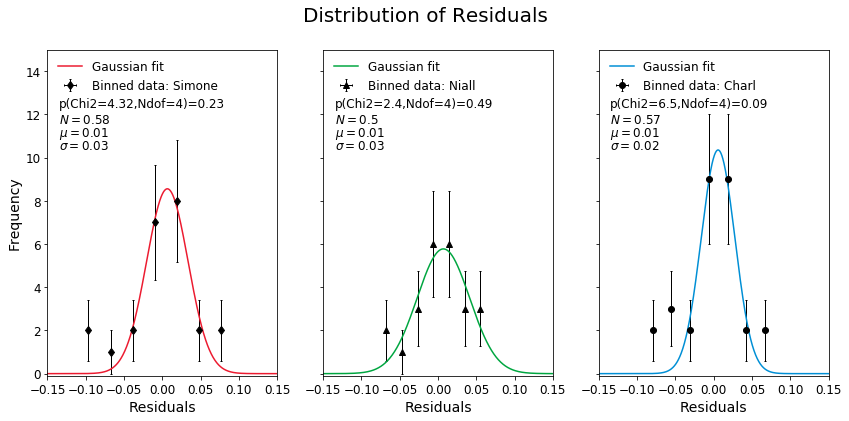

In [13]:
fig, axes = plt.subplots(figsize=(14, 6),nrows=1,ncols=3,sharey=True,sharex=True)

xaxis = np.linspace(-0.15,0.15,1000)
xs = 0.05
ys = 0.95

ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

plt.rcParams['axes.labelsize'] = 12

fig.suptitle('Distribution of Residuals', fontsize=20)

ax1.errorbar(bin_c_simone, counts_simone, yerr=s_counts_simone, xerr=0.0, fmt='dk',  ecolor='k', elinewidth=1, capsize=1, capthick=1,label='Binned data: Simone')
x = bin_c_simone
y = counts_simone
ey = s_counts_simone
N = np.sum(y)
mu = x.mean()
sigma = x.std()
popt,pcov = curve_fit(gaussian,x,y,p0=[N,mu,sigma])
perr = np.sqrt(np.diag(pcov))
yaxis=gaussian(xaxis,*popt)
ax1.plot(xaxis, yaxis, marker='', linestyle='-', color = red, label=f'Gaussian fit')

# Chi square
Ndof = len(x)-3
#chi2,p_val = chisquare(y, f_exp=gaussian(x,*popt), ddof=3)
chi2,p_val = get_chi2(y, ey, gaussian(x,*popt), ddof=3)
sss = f'p(Chi2={np.round(chi2,2)},Ndof={Ndof})={np.round(p_val,2)}'
ax1.text(0.05,ys-3.2/25,sss,horizontalalignment='left',verticalalignment='baseline', transform=ax1.transAxes,fontsize=12)

s = [r'$N =$',r'$\mu =$',r'$\sigma =$']
ss = [f'{np.round(popt[0],2)}',f'{np.round(popt[1],2)}',f'{np.round(popt[2],2)}']
for i in range(len(s)):
    ax1.text(xs, ys-3.2/25-(i+1.2)/25, s[i]+ss[i], horizontalalignment='left',verticalalignment='baseline', transform=ax1.transAxes,fontsize=12)
ax1.legend(loc='upper left',frameon=False)
    
ax2.errorbar(bin_c_niall, counts_niall, yerr=s_counts_niall, xerr=0.0, fmt='^k',  ecolor='k', elinewidth=1, capsize=1, capthick=1,label='Binned data: Niall')
x = bin_c_niall
y = counts_niall
ey = s_counts_niall
N = np.sum(y)
mu = x.mean()
sigma = x.std()
popt,pcov = curve_fit(gaussian,x,y,p0=[N,mu,sigma])
perr = np.sqrt(np.diag(pcov))
yaxis=gaussian(xaxis,*popt)
ax2.plot(xaxis, yaxis,  marker='', linestyle='-', color = green, label=f'Gaussian fit')

# Chi square
Ndof = len(x)-3
##chi2,p_val = chisquare(y, f_exp=gaussian(x,*popt), ddof=3)
chi2,p_val = get_chi2(y, ey, gaussian(x,*popt), ddof=3)
sss = f'p(Chi2={np.round(chi2,2)},Ndof={Ndof})={np.round(p_val,2)}'
ax2.text(0.05,ys-3.2/25,sss,horizontalalignment='left',verticalalignment='baseline', transform=ax2.transAxes,fontsize=12)

s = [r'$N =$',r'$\mu =$',r'$\sigma =$']
ss = [f'{np.round(popt[0],2)}',f'{np.round(popt[1],2)}',f'{np.round(popt[2],2)}']
for i in range(len(s)):
    ax2.text(xs, ys-3.2/25-(i+1.2)/25, s[i]+ss[i], horizontalalignment='left',verticalalignment='baseline', transform=ax2.transAxes,fontsize=12)
ax2.legend(loc='upper left',frameon=False)

ax3.errorbar(bin_c_charl, counts_charl, yerr=s_counts_charl, xerr=0.0, fmt='ok',  ecolor='k', elinewidth=1, capsize=1, capthick=1,label='Binned data: Charl')
x = bin_c_charl
y = counts_charl
ey = s_counts_charl
N = np.sum(y)
mu = x.mean()
sigma = x.std()
popt,pcov = curve_fit(gaussian,x,y,p0=[N,mu,sigma])
perr = np.sqrt(np.diag(pcov))
yaxis=gaussian(xaxis,*popt)
ax3.plot(xaxis, yaxis, marker='', linestyle='-', color = blue, label=f'Gaussian fit')

# Chi square
Ndof = len(x)-3
#chi2,p_val = chisquare(y, f_exp=gaussian(x,*popt), ddof=3)
chi2,p_val = get_chi2(y, ey, gaussian(x,*popt), ddof=3)
sss = f'p(Chi2={np.round(chi2,2)},Ndof={Ndof})={np.round(p_val,2)}'
ax3.text(0.05,ys-3.2/25,sss,horizontalalignment='left',verticalalignment='baseline', transform=ax3.transAxes,fontsize=12)

s = [r'$N =$',r'$\mu =$',r'$\sigma =$']
ss = [f'{np.round(popt[0],2)}',f'{np.round(popt[1],2)}',f'{np.round(popt[2],2)}']
for i in range(len(s)):
    ax3.text(xs, ys-3.2/25-(i+1.2)/25, s[i]+ss[i], horizontalalignment='left',verticalalignment='baseline', transform=ax3.transAxes,fontsize=12)
ax3.legend(loc='upper left',frameon=False)

ax1.set_ylabel('Frequency', fontsize=14)
ax1.set_xlabel('Residuals', fontsize=14)
ax2.set_xlabel('Residuals', fontsize=14)
ax3.set_xlabel('Residuals', fontsize=14)

ax1.set_xlim(-0.15,0.15)
ax1.set_ylim(-0.1,15)

plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.rc('legend', fontsize=12)

# Save the figure
fig.savefig('{0}/{1}.pdf'.format(path,'pendulum_residuals'), bbox_inches = "tight")

